# 1. Importing and Browsing Data 

Performed by: Kendall and Andrew

In [174]:
cd data

[WinError 2] The system cannot find the file specified: 'data'
C:\Users\Jackson\Documents\flatiron\project1\dsc-phase-1-project-v3\data


In [175]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.ticker as mticker
from matplotlib.ticker import PercentFormatter
aviation = pd.read_csv('Aviation_Data.csv')

C:\Users\Jackson\anaconda\anaconda-this one\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [176]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [177]:
aviation.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# 2. Cleaning Data

Performed by: Kendall and Andrew

1. Drop duplicates based on event ID: 1390 entries.
2. Standardized weather conditions (upper/lower casing)
3. Standardized make names (upper/lower casing)
4. Drop null values for event date: 1 entry.
4. Created Year column.

In [178]:
#dropping dupliates
duplicates = aviation[aviation.duplicated()]
print(len(duplicates))
duplicates.head(30)
aviation = aviation.drop_duplicates(subset='Event.Id')

1390


In [179]:
#dropping event ID N/A
aviation.dropna(subset=['Event.Id'], inplace=True)

In [180]:
#standardizing weather conditions
aviation['Weather.Condition'] = aviation['Weather.Condition'].replace('Unk', 'UNK')

In [181]:
aviation['Engine.Type'] = aviation['Engine.Type'].replace('NONE', 'None')

In [182]:
#standardizing make names
aviation['Make'] = aviation['Make'].apply(lambda x: str(x).title())
aviation['Make'] = aviation['Make'].replace('PIPER', 'Piper')
aviation['Make'] = aviation['Make'].replace('CESSNA', 'Cessna')
aviation['Make'] = aviation['Make'].replace('BEECH', 'Beech')
aviation['Make'] = aviation['Make'].replace('BELL', 'Bell')

In [183]:
aviation['Make'].value_counts()

Cessna             26839
Piper              14744
Beech               5332
Bell                2706
Boeing              2652
                   ...  
Kevin Leue             1
Teschendorf            1
Mcculley Ronald        1
Dean Patrick G         1
Jim Riggs              1
Name: Make, Length: 7553, dtype: int64

In [184]:
#dropping nans for event date
aviation.dropna(subset=['Event.Date'], inplace=True)

In [185]:
#creating year column
aviation['Year'] = aviation['Event.Date'].astype(str).str[:4]

In [186]:
#how can a plane have 0 engines? what are these 0 engine values?
zero_engine_aircrafts = aviation.loc[aviation['Number.of.Engines'] == 0]

In [187]:
#counting entires with 0 engines and looking more into the aircraft category
len(zero_engine_aircrafts), zero_engine_aircrafts['Aircraft.Category'].value_counts()

(1210,
 Glider          344
 Balloon         150
 Airplane          9
 Weight-Shift      1
 Name: Aircraft.Category, dtype: int64)

In [188]:
#dropping aircrafts with zero engines from our aviation dataset
aviation = aviation.loc[aviation['Number.of.Engines'] != 0]

# 3A. ENGINE COUNT & TYPE - Trend Exploration

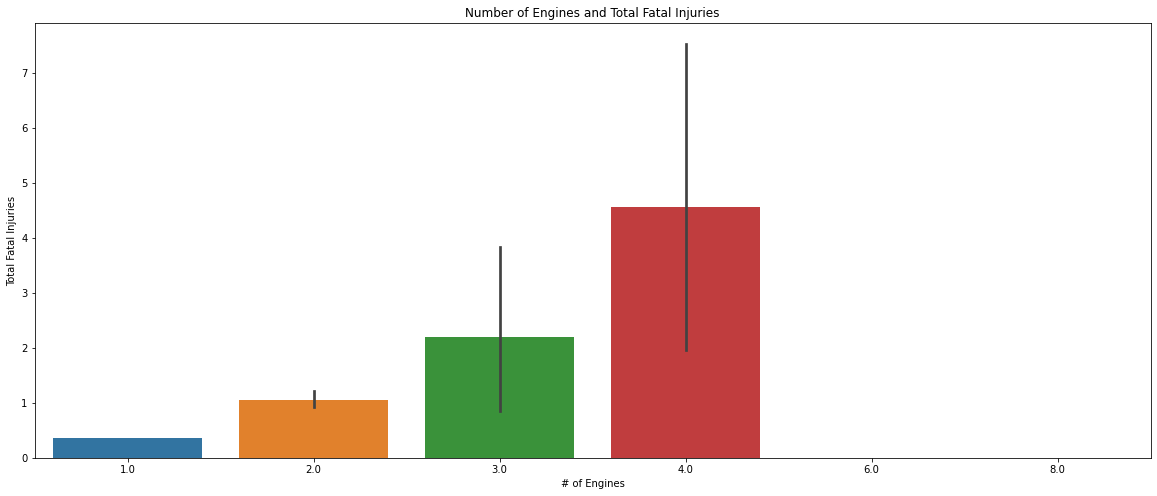

In [287]:
#plot of engine count and fatal injuries
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Number.of.Engines'], y=aviation['Total.Fatal.Injuries'])

ax.set_title('Number of Engines and Total Fatal Injuries')
ax.set_xlabel('# of Engines')
ax.set_ylabel('Total Fatal Injuries');

In [190]:
#sum of injuries for engine count
engine_count = aviation.groupby('Number.of.Engines').sum()
engine_count

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,,,,
1.0,21627.0,13818.0,17592.0,71816.0
2.0,10048.0,3385.0,4416.0,183081.0
3.0,861.0,316.0,1141.0,46148.0
4.0,1651.0,231.0,506.0,37622.0
6.0,0.0,0.0,0.0,0.0
8.0,0.0,21.0,3.0,11.0


In [191]:
#means of injueries for engine count
aviation.groupby('Number.of.Engines').mean()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,,,,
1.0,0.359444,0.232056,0.291925,1.109916
2.0,1.052918,0.361839,0.474227,17.838936
3.0,2.190840,0.784119,2.881313,104.171558
4.0,4.560773,0.634615,1.390110,93.354839
6.0,0.000000,0.000000,0.000000,0.000000
8.0,0.000000,7.000000,1.000000,3.666667


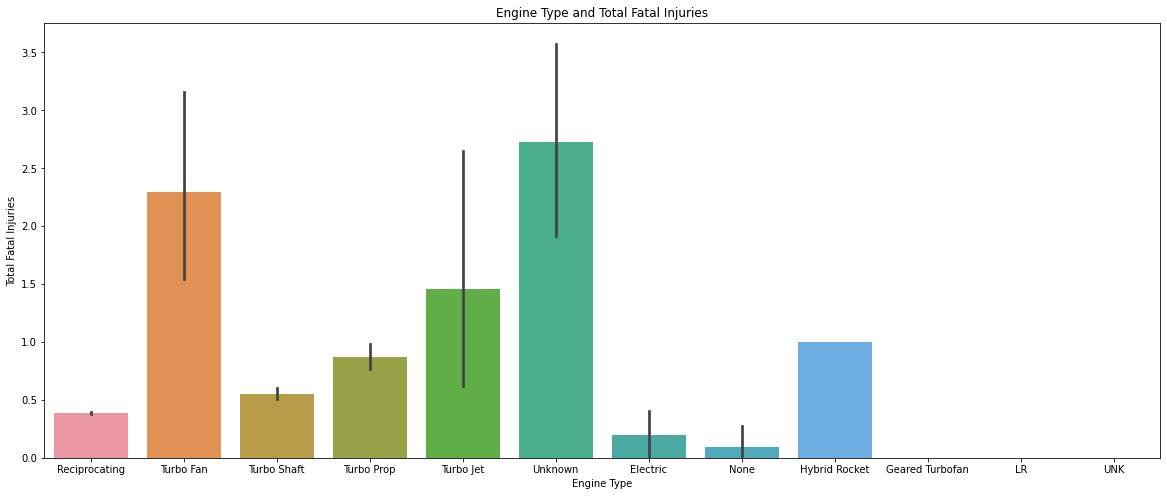

In [192]:
#plot of engine type and total fatal injuries
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Engine.Type'], y=aviation['Total.Fatal.Injuries'])

ax.set_title('Engine Type and Total Fatal Injuries')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Total Fatal Injuries');

In [193]:
engine_count['Total Passengers'] = engine_count['Total.Fatal.Injuries'] + engine_count['Total.Serious.Injuries'] + engine_count['Total.Minor.Injuries'] + engine_count['Total.Uninjured']

# 3B: ENGINE COUNT - Ratio of Uninjured to All Passengers 

Performed by: Kendall 

In [194]:
engine_count['Ratio Uninjured'] = engine_count['Total.Uninjured'] / engine_count['Total Passengers']
engine_count

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Passengers,Ratio Uninjured
Number.of.Engines,,,,,,
1.0,21627.0,13818.0,17592.0,71816.0,124853.0,0.575204
2.0,10048.0,3385.0,4416.0,183081.0,200930.0,0.911168
3.0,861.0,316.0,1141.0,46148.0,48466.0,0.952173
4.0,1651.0,231.0,506.0,37622.0,40010.0,0.940315
6.0,0.0,0.0,0.0,0.0,0.0,NaN
8.0,0.0,21.0,3.0,11.0,35.0,0.314286


In [195]:
engine_count

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Passengers,Ratio Uninjured
Number.of.Engines,,,,,,
1.0,21627.0,13818.0,17592.0,71816.0,124853.0,0.575204
2.0,10048.0,3385.0,4416.0,183081.0,200930.0,0.911168
3.0,861.0,316.0,1141.0,46148.0,48466.0,0.952173
4.0,1651.0,231.0,506.0,37622.0,40010.0,0.940315
6.0,0.0,0.0,0.0,0.0,0.0,NaN
8.0,0.0,21.0,3.0,11.0,35.0,0.314286


In [ ]:
grid = sns.catplot(x='coast', kind='count', data=data)
ax = grid.axes[0, 0]
ax.bar_label(ax.containers[0])

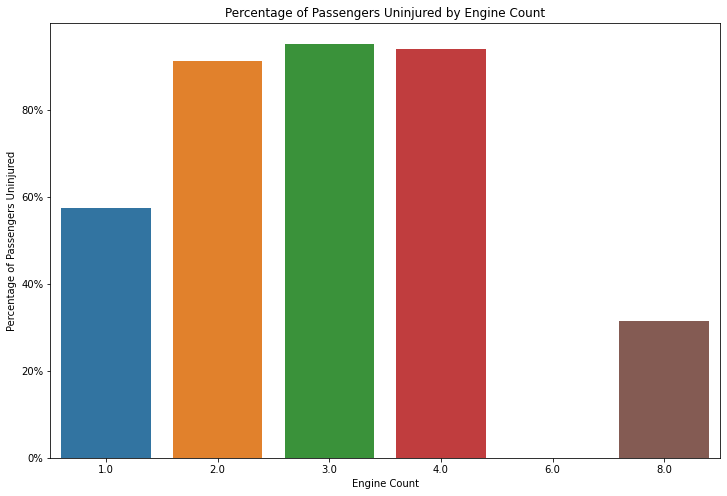

In [298]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x=engine_count.index, y=engine_count['Ratio Uninjured'])
ax.set_title('Percentage of Passengers Uninjured by Engine Count')
ax.set_xlabel('Engine Count')
ax.set_ylabel('Percentage of Passengers Uninjured')
ax.axes.yaxis.set_major_formatter(PercentFormatter(1));

*94-95% of passengers in accidents of planes with 3 and 4 engines were uninjured.

# 3C: ENGINE TYPE - Ratio of Uninjured to All Passengers 


Performed by: Kendall

In [197]:
#sums of engine types and total injuries
aviation.groupby('Engine.Type').sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Engine.Type,,,,,
Electric,24.0,2.0,1.0,0.0,7.0
Geared Turbofan,22.0,0.0,0.0,0.0,121.0
Hybrid Rocket,1.0,1.0,0.0,1.0,0.0
LR,16.0,0.0,21.0,3.0,11.0
None,11.0,1.0,8.0,7.0,65.0
Reciprocating,74452.0,23125.0,13366.0,17157.0,72941.0
Turbo Fan,5344.0,4419.0,1812.0,3279.0,194409.0
Turbo Jet,1446.0,841.0,234.0,363.0,32504.0
Turbo Prop,5126.0,2448.0,671.0,885.0,14836.0


In [198]:
#means of engine type and number of injuries
aviation.groupby('Engine.Type').mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Engine.Type,,,,,
Electric,3.000000,0.200000,0.100000,0.000000,0.700000
Geared Turbofan,2.000000,0.000000,0.000000,0.000000,10.083333
Hybrid Rocket,1.000000,1.000000,0.000000,1.000000,0.000000
LR,8.000000,0.000000,10.500000,1.500000,5.500000
None,1.571429,0.090909,0.727273,0.636364,5.909091
Reciprocating,1.088830,0.383728,0.224571,0.285223,1.128524
Turbo Fan,2.337708,2.294393,0.908726,1.675524,83.688765
Turbo Jet,2.139053,1.460069,0.406957,0.640212,50.083205
Turbo Prop,1.572875,0.869936,0.248151,0.323111,4.851537


In [199]:
engine_types = aviation.groupby('Engine.Type').sum()

In [200]:
#creating a total passengers column and then a ratio of total uninjured to total passengers
engine_types['Total Passengers'] = engine_types['Total.Fatal.Injuries'] + engine_types['Total.Serious.Injuries'] + engine_types['Total.Minor.Injuries'] + engine_types['Total.Uninjured']
engine_types['Ratio Uninjured'] = engine_types['Total.Uninjured'] / engine_types['Total Passengers']

In [201]:
engine_types

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Passengers,Ratio Uninjured
Engine.Type,,,,,,,
Electric,24.0,2.0,1.0,0.0,7.0,10.0,0.700000
Geared Turbofan,22.0,0.0,0.0,0.0,121.0,121.0,1.000000
Hybrid Rocket,1.0,1.0,0.0,1.0,0.0,2.0,0.000000
LR,16.0,0.0,21.0,3.0,11.0,35.0,0.314286
None,11.0,1.0,8.0,7.0,65.0,81.0,0.802469
Reciprocating,74452.0,23125.0,13366.0,17157.0,72941.0,126589.0,0.576203
Turbo Fan,5344.0,4419.0,1812.0,3279.0,194409.0,203919.0,0.953364
Turbo Jet,1446.0,841.0,234.0,363.0,32504.0,33942.0,0.957634
Turbo Prop,5126.0,2448.0,671.0,885.0,14836.0,18840.0,0.787473


In [202]:
#making the column into a percentage format
#engine_types['Ratio Uninjured'] = engine_types['Ratio Uninjured']*100 
#engine_types['Ratio Uninjured'] = engine_types['Ratio Uninjured'].map('{:.2%}'.format)

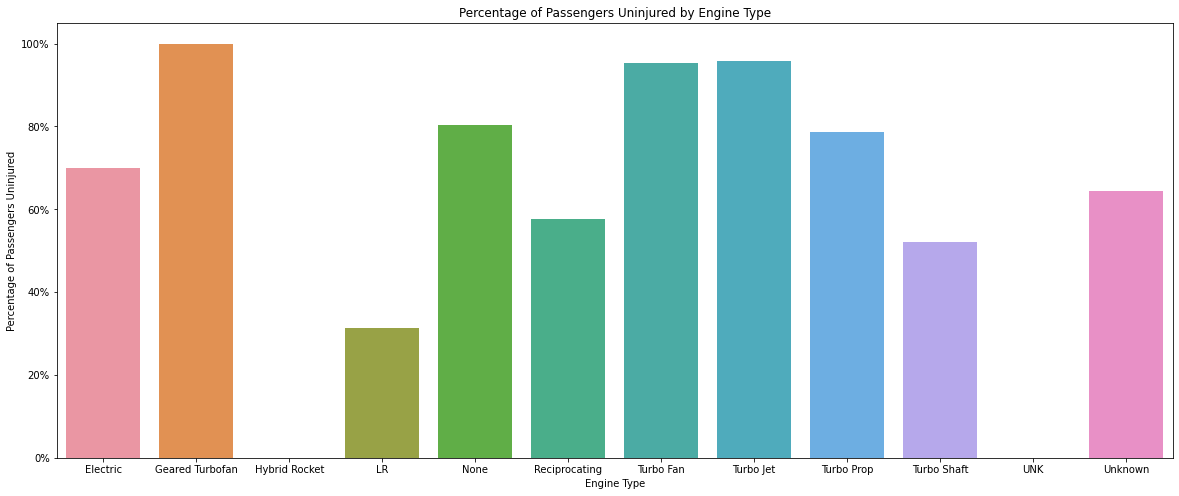

In [203]:
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=engine_types.index, y=engine_types['Ratio Uninjured'])
ax.set_title('Percentage of Passengers Uninjured by Engine Type')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Percentage of Passengers Uninjured')
ax.axes.yaxis.set_major_formatter(PercentFormatter(1));

*Over 95% of passengers on Turbo Fan and Turbo Jet planes are uninjured. 

# 4A. AIRCRAFT DAMAGE - Trend Exploration

Performed by: Kendall

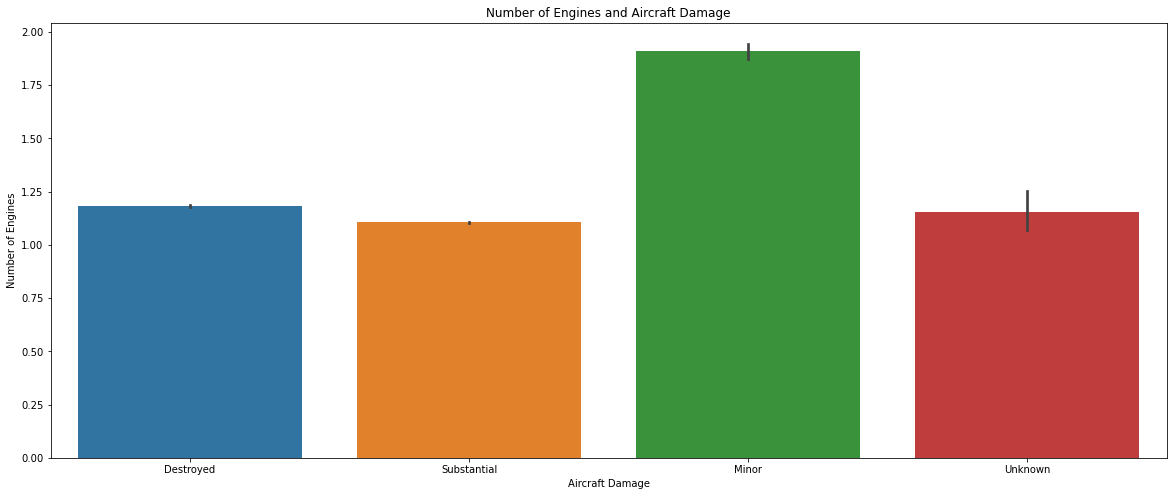

In [204]:
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Aircraft.damage'], y=aviation['Number.of.Engines'])

ax.set_title('Number of Engines and Aircraft Damage')
ax.set_xlabel('Aircraft Damage')
ax.set_ylabel('Number of Engines');

In [205]:
aviation.groupby('Aircraft.damage').sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Aircraft.damage,,,,,
Destroyed,19650.0,39366.0,6836.0,5972.0,8403.0
Minor,3918.0,275.0,461.0,1727.0,104974.0
Substantial,66512.0,7660.0,12147.0,17335.0,145011.0
Unknown,68.0,55.0,16.0,25.0,477.0


In [206]:
aviation.groupby('Aircraft.damage').mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Aircraft.damage,,,,,
Destroyed,1.183022,2.238358,0.427758,0.378598,0.534100
Minor,1.910288,0.123043,0.205162,0.770638,41.312082
Substantial,1.105328,0.143850,0.226644,0.317986,2.427694
Unknown,1.152542,0.470085,0.136752,0.213675,4.076923


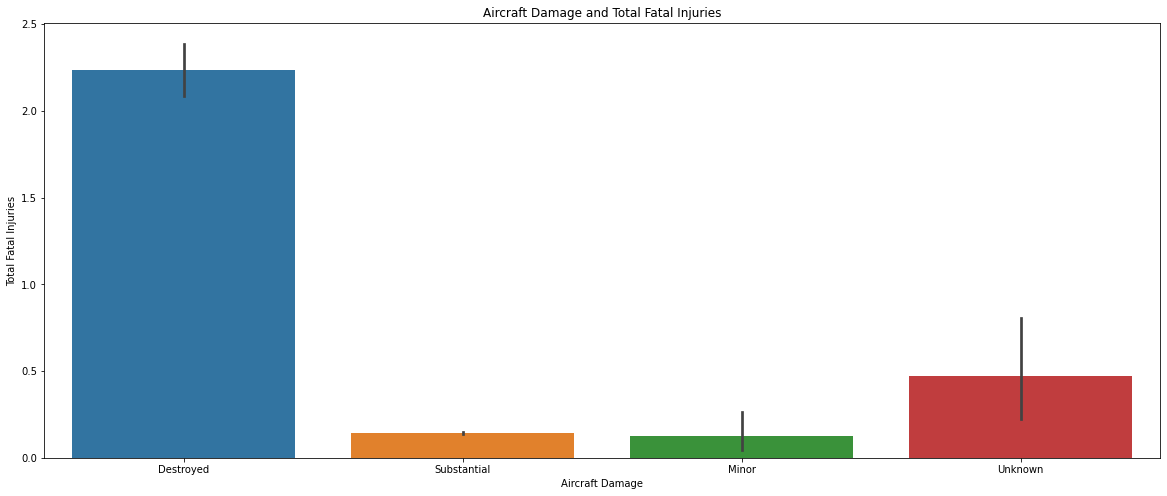

In [207]:
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Aircraft.damage'], y=aviation['Total.Fatal.Injuries'])

ax.set_title('Aircraft Damage and Total Fatal Injuries')
ax.set_xlabel('Aircraft Damage')
ax.set_ylabel('Total Fatal Injuries');

In [208]:
aviation.groupby(['Aircraft.damage','Number.of.Engines']).mean()

Total.Fatal.Injuries  \
Aircraft.damage Number.of.Engines                         
Destroyed       1.0                            1.209835   
                2.0                            3.244898   
                3.0                           43.111111   
                4.0                           30.185185   
Minor           1.0                            0.107692   
                2.0                            0.204545   
                3.0                            0.023256   
                4.0                            0.000000   
Substantial     1.0                            0.117554   
                2.0                            0.179160   
                3.0                            1.025974   
                4.0                            0.168421   
                6.0                            0.000000   
                8.0                            0.000000   
Unknown         1.0                            0.260000   
                2.0                            0.222222   

                                   Total.Serious.Injuries  \
Aircraft.damage Number.of.Engines                           
Destroyed       1.0                              0.332518   
                2.0                              0.505700   
                3.0                              6.368421   
                4.0                              2.489796   
Minor           1.0                              0.127731   
                2.0                              0.159215   
                3.0                              0.580460   
                4.0                              0.274194   
Substantial     1.0                              0.205748   
                2.0                              0.272653   
                3.0                              0.333333   
                4.0                              0.210526   
                6.0                              0.000000   
                8.0                              4.000000   
Unknown         1.0                              0.280000   
                2.0                              0.000000   

                                   Total.Minor.Injuries  Total.Uninjured  
Aircraft.damage Number.of.Engines                                         
Destroyed       1.0                            0.276398         0.254960  
                2.0                            0.546093         0.729201  
                3.0                           13.315789        29.888889  
                4.0                            0.877551         5.958333  
Minor           1.0                            0.104274         2.282407  
                2.0                            0.541893        47.590521  
                3.0                            2.086207       112.520833  
                4.0                            1.184000       102.949640  
Substantial     1.0                            0.299101         1.267851  
                2.0                            0.379891         8.489107  
                3.0                            2.207792        68.204082  
                4.0                            1.114583        70.800000  
                6.0                            0.000000         0.000000  
                8.0                            0.500000         5.000000  
Unknown         1.0                            0.240000         0.900000  
                2.0                            0.777778         1.666667

In [209]:
aviation.groupby(['Number.of.Engines','Engine.Type']).mean()

Total.Fatal.Injuries  \
Number.of.Engines Engine.Type                             
1.0               Electric                     0.250000   
                  Hybrid Rocket                1.000000   
                  None                         0.000000   
                  Reciprocating                0.343138   
                  Turbo Fan                    0.840000   
                  Turbo Jet                    0.593023   
                  Turbo Prop                   0.509322   
                  Turbo Shaft                  0.488731   
                  UNK                          0.000000   
                  Unknown                      0.381818   
2.0               Geared Turbofan              0.000000   
                  None                         0.000000   
                  Reciprocating                0.767911   
                  Turbo Fan                    1.562312   
                  Turbo Jet                    1.081921   
                  Turbo Prop                   1.074675   
                  Turbo Shaft                  0.912833   
                  Unknown                      0.555556   
3.0               Reciprocating                0.000000   
                  Turbo Fan                    2.333333   
                  Turbo Jet                    0.094118   
                  Unknown                      0.000000   
4.0               Electric                     0.000000   
                  None                         0.000000   
                  Reciprocating                1.122449   
                  Turbo Fan                    6.153061   
                  Turbo Jet                    6.181818   
                  Turbo Prop                   3.375000   
                  Unknown                      0.000000   
8.0               Electric                     0.000000   
                  LR                           0.000000   

                                   Total.Serious.Injuries  \
Number.of.Engines Engine.Type                               
1.0               Electric                       0.250000   
                  Hybrid Rocket                  0.000000   
                  None                           0.800000   
                  Reciprocating                  0.223722   
                  Turbo Fan                      0.157895   
                  Turbo Jet                      0.250000   
                  Turbo Prop                     0.214539   
                  Turbo Shaft                    0.397076   
                  UNK                            0.000000   
                  Unknown                        0.333333   
2.0               Geared Turbofan                0.000000   
                  None                           3.000000   
                  Reciprocating                  0.227868   
                  Turbo Fan                      0.853852   
                  Turbo Jet                      0.501393   
                  Turbo Prop                     0.275792   
                  Turbo Shaft                    0.414216   
                  Unknown                        0.315789   
3.0               Reciprocating                  0.400000   
                  Turbo Fan                      0.979592   
                  Turbo Jet                      0.238636   
                  Unknown                        0.000000   
4.0               Electric                       0.000000   
                  None                           0.000000   
                  Reciprocating                  0.255319   
                  Turbo Fan                      0.950000   
                  Turbo Jet                      0.222222   
                  Turbo Prop                     0.193548   
                  Unknown                        0.000000   
8.0               Electric                       0.000000   
                  LR                            10.500000   

                                   Total.Minor.Injuries  Total.Uninjured 

In [210]:
pd.set_option('display.max_columns', None)

In [211]:
aviation.groupby(['Number.of.Engines','Purpose.of.flight']).mean()

Total.Fatal.Injuries  \
Number.of.Engines Purpose.of.flight                                 
1.0               ASHO                                   1.600000   
                  Aerial Application                     0.115517   
                  Aerial Observation                     0.511864   
                  Air Drop                               0.142857   
                  Air Race show                          0.437500   
...                                                           ...   
4.0               Public Aircraft - Federal              2.000000   
                  Unknown                                7.068807   
6.0               Flight Test                            0.000000   
8.0               Business                               0.000000   
                  Flight Test                            0.000000   

                                             Total.Serious.Injuries  \
Number.of.Engines Purpose.of.flight                                   
1.0               ASHO                                     0.200000   
                  Aerial Application                       0.141089   
                  Aerial Observation                       0.380623   
                  Air Drop                                 0.571429   
                  Air Race show                            0.109375   
...                                                             ...   
4.0               Public Aircraft - Federal                0.000000   
                  Unknown                                  0.759091   
6.0               Flight Test                              0.000000   
8.0               Business                                10.500000   
                  Flight Test                              0.000000   

                                             Total.Minor.Injuries  \
Number.of.Engines Purpose.of.flight                                 
1.0               ASHO                                   0.000000   
                  Aerial Application                     0.187530   
                  Aerial Observation                     0.409168   
                  Air Drop                               0.000000   
                  Air Race show                          0.109375   
...                                                           ...   
4.0               Public Aircraft - Federal              0.000000   
                  Unknown                                1.671233   
6.0               Flight Test                            0.000000   
8.0               Business                               1.500000   
                  Flight Test                            0.000000   

                                             Total.Uninjured  
Number.of.Engines Purpose.of.flight                           
1.0               ASHO                              0.200000  
                  Aerial Application                0.661354  
                  Aerial Observation                0.991790  
                  Air Drop                          1.333333  
                  Air Race show                     0.562500  
...                                                      ...  
4.0               Public Aircraft - Federal         3.000000  
                  Unknown                         122.022422  
6.0               Flight Test                       0.000000  
8.0               Business                          5.500000  
                  Flight Test                       0.000000  

[72 rows x 4 columns]

In [212]:
aviation.groupby(['Year']).mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Year,,,,,
1948,1.000000,2.000000,0.000000,0.000000,0.000000
1962,1.000000,4.000000,0.000000,0.000000,0.000000
1974,1.000000,3.000000,NaN,NaN,NaN
1977,1.000000,2.000000,0.000000,0.000000,0.000000
1979,2.000000,1.000000,2.000000,1.000000,22.000000
1981,1.000000,4.000000,0.000000,0.000000,0.000000
1982,1.161142,0.439478,0.197269,0.280569,2.353077
1983,1.168227,0.358915,0.188150,0.298322,3.978650
1984,1.182174,0.351642,0.199164,0.304569,3.347230


In [213]:
aviation['Aircraft.damage'].value_counts()

Substantial    62812
Destroyed      18231
Minor           2613
Unknown          117
Name: Aircraft.damage, dtype: int64

In [214]:
aviation['Aircraft.damage'].value_counts()

Substantial    62812
Destroyed      18231
Minor           2613
Unknown          117
Name: Aircraft.damage, dtype: int64

# 3B: AIRCRAFT DAMAGE - Ratio of Minor Damage to All

Performed by: Kendall

Creating a Zero Engine dataframe in order to Calculate the Percentage of Zero Engine Planes with Minor Damage Relative to All Zero Engine Accidents 

6.8% of planes with zero engines come away from an accident with only minor damage. Otherwise, there is substantial damage or it is destroyed. 

In [215]:
one_engine = aviation.loc[aviation['Number.of.Engines'] == 1]

In [216]:
one_engine['Aircraft.damage'].value_counts()

Substantial    54172
Destroyed      13703
Minor            658
Unknown           50
Name: Aircraft.damage, dtype: int64

In [217]:
one_engine_minor_damage_ratio = one_engine['Aircraft.damage'].value_counts().values[2] / one_engine['Aircraft.damage'].value_counts().sum()

In [218]:
one_engine_minor_damage_ratio

0.009594214309668577

Less than 1% of planes with one engine come away from an accident with only minor damage. Otherwise, there is substantial damage or it is destroyed.

In [219]:
two_engines = aviation.loc[aviation['Number.of.Engines'] == 2]

In [220]:
two_engines['Aircraft.damage'].value_counts()

Substantial    5790
Destroyed      2829
Minor          1060
Unknown           9
Name: Aircraft.damage, dtype: int64

In [221]:
two_engines_minor_damage_ratio = two_engines['Aircraft.damage'].value_counts().values[2] / two_engines['Aircraft.damage'].value_counts().sum()

In [222]:
two_engines_minor_damage_ratio

0.10941370767960364

10.9% of planes with two engines come away from an accident with only minor damage. Otherwise, there is substantial damage or it is destroyed. 

In [223]:
three_engines = aviation.loc[aviation['Number.of.Engines'] == 3]

In [224]:
three_engines['Aircraft.damage'].value_counts()

Minor          192
Substantial     98
Destroyed       23
Name: Aircraft.damage, dtype: int64

In [225]:
three_engines_minor_damage_ratio = three_engines['Aircraft.damage'].value_counts().values[0] / three_engines['Aircraft.damage'].value_counts().sum()

In [226]:
three_engines_minor_damage_ratio 

0.6134185303514377

61.3% of planes with three engines come away from an accident with only minor damage. Otherwise, there is substantial damage or it is destroyed. It is important to note that the sample size is much smaller for three engine planes.

In [227]:
four_engines = aviation.loc[aviation['Number.of.Engines'] == 4]

In [228]:
four_engines['Aircraft.damage'].value_counts()

Minor          141
Substantial    111
Destroyed       55
Name: Aircraft.damage, dtype: int64

In [229]:
four_engines_minor_damage_ratio = four_engines['Aircraft.damage'].value_counts().values[0] / four_engines['Aircraft.damage'].value_counts().sum()

In [230]:
four_engines_minor_damage_ratio

0.4592833876221498

45.9% of planes with four engines come away from an accident with only minor damage. Otherwise, there is substantial damage or it is destroyed. It is important to note that the sample size is much smaller for four engine planes.

In [231]:
x = ['One Engine', 'Two Engines', 'Three Engines', 'Four Engines']
y = [one_engine_minor_damage_ratio, two_engines_minor_damage_ratio, three_engines_minor_damage_ratio, four_engines_minor_damage_ratio] 

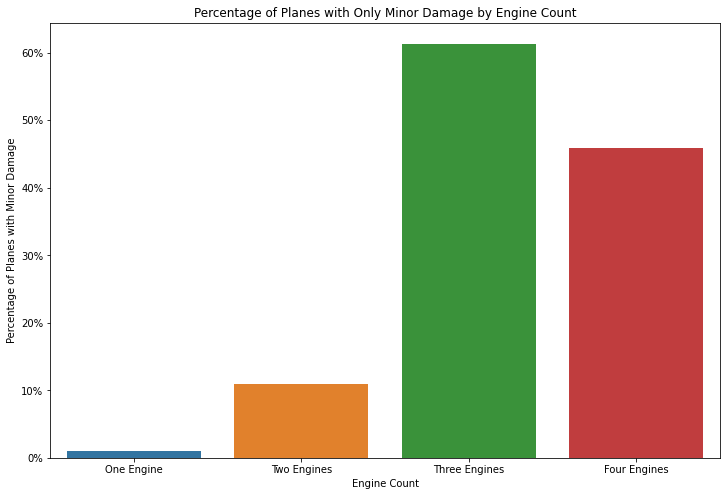

In [232]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x=x, y=y)
ax.set_title('Percentage of Planes with Only Minor Damage by Engine Count')
ax.set_xlabel('Engine Count')
ax.set_ylabel('Percentage of Planes with Minor Damage')
ax.axes.yaxis.set_major_formatter(PercentFormatter(1));

# 5A. Creating an "Aviation Severe" DataFrame 

Performed by: Kendall and Andrew

This includes accidents with at least one fatality, at least one serious injury, or a completely destroyed aircraft.

In [233]:
aviation_severe = aviation.loc[
    (aviation['Total.Fatal.Injuries'] >= 1) | 
    (aviation['Total.Serious.Injuries'] >= 1) |
    (aviation['Aircraft.damage'] == 'Destroyed')
]

In [234]:
aviation_severe.head(50)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N4988E,Cessna,180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,1981
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,Non-Fatal,Destroyed,Airplane,N14779,Bellanca,17-30A,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,Fatal(1),Destroyed,Airplane,N758SK,Cessna,R172K,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1982
14,20020917X02119,Accident,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,Airplane,N4876K,Navion,A,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982
15,20020917X02117,Accident,FTW82FPG08,1982-01-02,"LITTLE ROCK, AR",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,Airplane,N9779L,Beech,19,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982


In [235]:
aviation_severe.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,28798.000000,29927.000000,28814.000000,27614.000000,27548.000000
mean,1.166296,1.610051,0.721004,0.425617,3.022397
std,0.414960,8.376366,2.441828,2.676532,21.856156
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,1.000000,0.000000,0.000000
max,8.000000,349.000000,161.000000,200.000000,558.000000


In [236]:
aviation_severe.shape

(31785, 32)

In [237]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86741 entries, 0 to 90347
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                86741 non-null  object 
 1   Investigation.Type      86741 non-null  object 
 2   Accident.Number         86741 non-null  object 
 3   Event.Date              86741 non-null  object 
 4   Location                86692 non-null  object 
 5   Country                 86522 non-null  object 
 6   Latitude                33694 non-null  object 
 7   Longitude               33685 non-null  object 
 8   Airport.Code            49097 non-null  object 
 9   Airport.Name            51586 non-null  object 
 10  Injury.Severity         85751 non-null  object 
 11  Aircraft.damage         83773 non-null  object 
 12  Aircraft.Category       31677 non-null  object 
 13  Registration.Number     85477 non-null  object 
 14  Make                    86741 non-null

In [238]:
aviation_severe.groupby(['Total.Fatal.Injuries']).sum()

,Number.of.Engines,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Total.Fatal.Injuries,,,,
0.0,13347.0,14105.0,6948.0,59699.0
1.0,8976.0,1921.0,1468.0,4088.0
2.0,5360.0,641.0,490.0,735.0
3.0,1702.0,556.0,300.0,323.0
4.0,1126.0,173.0,83.0,201.0
...,...,...,...,...
256.0,4.0,0.0,0.0,0.0
265.0,2.0,0.0,0.0,0.0
270.0,4.0,2.0,3.0,0.0


In [239]:
aviation_severe.groupby(['Total.Fatal.Injuries']).mean()

,Number.of.Engines,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Total.Fatal.Injuries,,,,
0.0,1.132349,1.122920,0.553141,4.753105
1.0,1.135484,0.256202,0.200082,0.558089
2.0,1.173123,0.149557,0.116196,0.175125
3.0,1.277778,0.430341,0.237342,0.257576
4.0,1.265169,0.191372,0.093679,0.227119
...,...,...,...,...
256.0,4.000000,0.000000,0.000000,0.000000
265.0,2.000000,NaN,NaN,NaN
270.0,4.000000,2.000000,3.000000,0.000000


In [240]:
aviation['Year'] = aviation['Year'].astype(int)

# 5B. Creating a "Recent Aviation Severe" (Since 2000) DataFrame 

Performed by: Kendall and Andrew

This includes accidents *since 2000* with at least one fatality, at least one serious injury, or a completely destroyed aircraft.

In [241]:
recent_aviation_severe = aviation_severe.loc[aviation['Year'] >= 2000]

In [242]:
recent_aviation_severe['Engine.Type'].value_counts()

Reciprocating    9816
Turbo Shaft       739
Turbo Prop        713
Turbo Fan         322
Unknown           126
Turbo Jet         114
None                6
Electric            5
LR                  2
Hybrid Rocket       1
Name: Engine.Type, dtype: int64

In [243]:
recent_aviation_severe['Number.of.Engines'].value_counts()

1.0    10656
2.0     1781
4.0       26
3.0       19
8.0        2
Name: Number.of.Engines, dtype: int64

In [244]:
recent_aviation_severe['Purpose.of.flight'].value_counts()

Personal                     8407
Instructional                1144
Aerial Application            583
Unknown                       471
Business                      430
Positioning                   314
Other Work Use                243
Aerial Observation            223
Flight Test                   166
Public Aircraft                98
Executive/corporate            86
Ferry                          85
Skydiving                      58
External Load                  49
Air Race show                  48
Banner Tow                     47
Public Aircraft - Federal      43
Air Race/show                  35
Public Aircraft - Local        30
Public Aircraft - State        27
Firefighting                   24
Glider Tow                     21
Air Drop                        6
ASHO                            4
Name: Purpose.of.flight, dtype: int64

In [245]:
recent_aviation_severe['Make'].value_counts()

Cessna        3365
Piper         2119
Beech         1025
Bell           544
Robinson       384
              ... 
Weston           1
Yates            1
Carbon           1
Ladd             1
Six-Chuter       1
Name: Make, Length: 2685, dtype: int64

In [246]:
recent_aviation_severe['Purpose.of.flight'].value_counts()

Personal                     8407
Instructional                1144
Aerial Application            583
Unknown                       471
Business                      430
Positioning                   314
Other Work Use                243
Aerial Observation            223
Flight Test                   166
Public Aircraft                98
Executive/corporate            86
Ferry                          85
Skydiving                      58
External Load                  49
Air Race show                  48
Banner Tow                     47
Public Aircraft - Federal      43
Air Race/show                  35
Public Aircraft - Local        30
Public Aircraft - State        27
Firefighting                   24
Glider Tow                     21
Air Drop                        6
ASHO                            4
Name: Purpose.of.flight, dtype: int64

# 6A. Aviation Severe - ENGINE COUNT - Ratio of Uninjured to All Passengers

Performed by Kendall

In [247]:
aviation_severe_engine_counts = aviation_severe.groupby(['Number.of.Engines']).mean()

In [248]:
aviation_severe_engine_counts['Total Passengers'] = aviation_severe_engine_counts['Total.Fatal.Injuries'] + aviation_severe_engine_counts['Total.Serious.Injuries'] + aviation_severe_engine_counts['Total.Minor.Injuries'] + aviation_severe_engine_counts['Total.Uninjured']

In [249]:
aviation_severe_engine_counts

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Passengers
Number.of.Engines,,,,,
1.0,0.941655,0.618393,0.276673,0.256408,2.093130
2.0,2.540582,0.898593,0.741523,11.805897,15.986594
3.0,9.159574,3.038462,9.010309,106.116505,127.324850
4.0,16.186275,2.221154,3.382353,97.192308,118.982089
8.0,0.000000,10.500000,1.500000,5.500000,17.500000


In [250]:
aviation_severe_engine_counts['Ratio of Uninjured'] = aviation_severe_engine_counts['Total.Uninjured'] / aviation_severe_engine_counts['Total Passengers'] 

In [251]:
aviation_severe_engine_counts

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Passengers,Ratio of Uninjured
Number.of.Engines,,,,,,
1.0,0.941655,0.618393,0.276673,0.256408,2.093130,0.122500
2.0,2.540582,0.898593,0.741523,11.805897,15.986594,0.738487
3.0,9.159574,3.038462,9.010309,106.116505,127.324850,0.833431
4.0,16.186275,2.221154,3.382353,97.192308,118.982089,0.816865
8.0,0.000000,10.500000,1.500000,5.500000,17.500000,0.314286


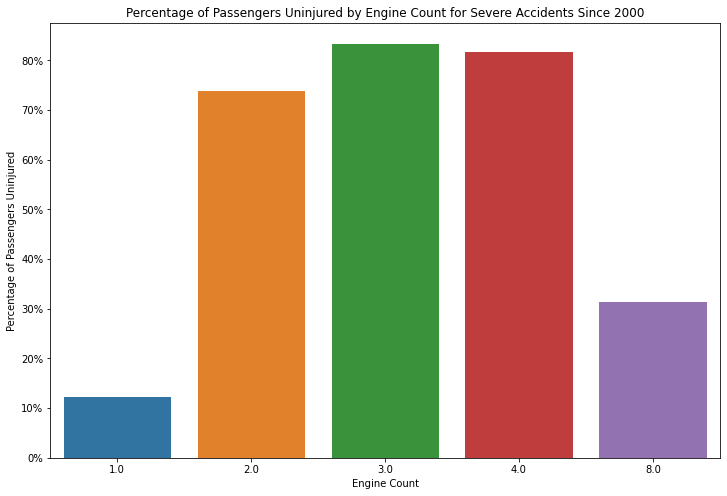

In [252]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x=aviation_severe_engine_counts.index, y=aviation_severe_engine_counts['Ratio of Uninjured'])
ax.set_title('Percentage of Passengers Uninjured by Engine Count for Severe Accidents Since 2000')
ax.set_xlabel('Engine Count')
ax.set_ylabel('Percentage of Passengers Uninjured')
ax.axes.yaxis.set_major_formatter(PercentFormatter(1));

# 6B. Aviation Severe - ENGINE TYPE - Ratio of Uninjured to All Passengers

In [253]:
aviation_severe_engine_types = recent_aviation_severe.groupby(['Engine.Type']).mean()

In [254]:
aviation_severe_engine_types['Total Passengers'] = aviation_severe_engine_types['Total.Fatal.Injuries'] + aviation_severe_engine_types['Total.Serious.Injuries'] + aviation_severe_engine_types['Total.Minor.Injuries'] + aviation_severe_engine_types['Total.Uninjured']

In [255]:
aviation_severe_engine_types

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Passengers
Engine.Type,,,,,,
Electric,1.750000,0.400000,0.200000,0.000000,1.000000,1.600000
Hybrid Rocket,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000
LR,8.000000,0.000000,10.500000,1.500000,5.500000,17.500000
None,1.250000,0.166667,1.333333,0.166667,4.833333,6.500000
Reciprocating,1.095238,1.046791,0.780719,0.260123,0.227857,2.315489
Turbo Fan,2.043333,7.506667,3.890845,2.741071,82.136201,96.274784
Turbo Jet,1.769912,1.988506,1.623529,0.637681,36.890244,41.139960
Turbo Prop,1.396731,1.971429,0.638577,0.433735,1.764133,4.807873
Turbo Shaft,1.164029,1.362319,0.940129,0.442623,0.453358,3.198429


In [256]:
aviation_severe_engine_types['Ratio of Uninjured'] = aviation_severe_engine_types['Total.Uninjured'] / aviation_severe_engine_types['Total Passengers'] 

In [257]:
aviation_severe_engine_types

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Passengers,Ratio of Uninjured
Engine.Type,,,,,,,
Electric,1.750000,0.400000,0.200000,0.000000,1.000000,1.600000,0.625000
Hybrid Rocket,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000
LR,8.000000,0.000000,10.500000,1.500000,5.500000,17.500000,0.314286
None,1.250000,0.166667,1.333333,0.166667,4.833333,6.500000,0.743590
Reciprocating,1.095238,1.046791,0.780719,0.260123,0.227857,2.315489,0.098406
Turbo Fan,2.043333,7.506667,3.890845,2.741071,82.136201,96.274784,0.853143
Turbo Jet,1.769912,1.988506,1.623529,0.637681,36.890244,41.139960,0.896701
Turbo Prop,1.396731,1.971429,0.638577,0.433735,1.764133,4.807873,0.366926
Turbo Shaft,1.164029,1.362319,0.940129,0.442623,0.453358,3.198429,0.141744


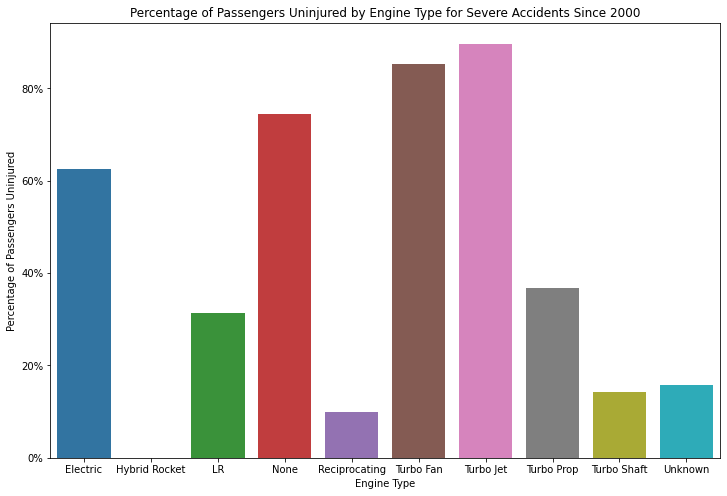

In [258]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x=aviation_severe_engine_types.index, y=aviation_severe_engine_types['Ratio of Uninjured'])
ax.set_title('Percentage of Passengers Uninjured by Engine Type for Severe Accidents Since 2000')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Percentage of Passengers Uninjured')
ax.axes.yaxis.set_major_formatter(PercentFormatter(1));

# 6C. Exploring Engine Counts for Turbo Fan and Turbo Jet Planes

Performed by: Kendall

In [259]:
turbo_jets = aviation.loc[aviation['Engine.Type'] == 'Turbo Jet']

In [260]:
turbo_jets['Number.of.Engines'].value_counts()

2.0    432
1.0     99
3.0     97
4.0     48
Name: Number.of.Engines, dtype: int64

In [261]:
turbo_fan = aviation.loc[aviation['Engine.Type'] == 'Turbo Fan']

In [262]:
turbo_fan['Number.of.Engines'].value_counts()

2.0    1693
3.0     330
4.0     235
1.0      28
Name: Number.of.Engines, dtype: int64

In [263]:
turbo_jets['Purpose.of.flight'].value_counts()

Unknown                      293
Personal                      85
Business                      43
Positioning                   43
Executive/corporate           31
Ferry                         13
Flight Test                   10
Instructional                 10
Public Aircraft                8
Public Aircraft - Federal      6
Air Race show                  5
Other Work Use                 5
Air Race/show                  2
Aerial Observation             2
Aerial Application             1
Firefighting                   1
Name: Purpose.of.flight, dtype: int64

In [264]:
turbo_fan['Purpose.of.flight'].value_counts()

Unknown                      908
Executive/corporate          115
Personal                      95
Positioning                   94
Business                      92
Instructional                 19
Flight Test                   14
Public Aircraft               14
Ferry                         12
Other Work Use                 8
Public Aircraft - Federal      4
Air Race show                  3
Aerial Application             2
Air Race/show                  2
Name: Purpose.of.flight, dtype: int64

# 6D. Creating Separate 1-2 Engines and Greater than 3 Engines DataFrames

Performed by: Kendall and Andrew

In [265]:
one_and_two_engines = aviation.loc[(aviation['Number.of.Engines'] < 3) & (aviation['Number.of.Engines'] > 0)]

In [266]:
greater_than_three_engines = aviation.loc[aviation['Number.of.Engines'] >= 3]

In [267]:
one_and_two_engines.shape

(79847, 32)

In [268]:
greater_than_three_engines.shape

(867, 32)

In [269]:
aviation['Make'].value_counts()[0:50]

Cessna                            26803
Piper                             14697
Beech                              5320
Bell                               2680
Boeing                             2637
Mooney                             1321
Robinson                           1223
Grumman                            1155
Bellanca                           1032
Hughes                              925
Air Tractor                         684
Aeronca                             628
Maule                               585
Mcdonnell Douglas                   569
Schweizer                           561
Champion                            517
Stinson                             433
Aero Commander                      425
Luscombe                            411
De Havilland                        407
Aerospatiale                        379
Taylorcraft                         378
North American                      373
Rockwell                            351
Hiller                              347


In [270]:
greater_than_three_engines.groupby('Make').mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
Make,,,,,,
Airbus,4.000000,0.000000,0.000000,0.000000,386.000000,2009.000000
Airbus Industrie,4.000000,0.000000,3.000000,22.500000,196.000000,2000.250000
Antonov,4.000000,0.000000,0.000000,2.000000,4.000000,2012.000000
Bae,4.000000,1.500000,0.000000,0.000000,24.250000,2013.500000
Bae Systems (Operations) Limit,4.000000,0.000000,0.000000,0.000000,1.000000,2013.000000
Bell,4.000000,0.000000,0.000000,0.000000,0.000000,2021.000000
Boeing,3.468410,3.651961,0.747596,1.683824,117.423503,1993.551198
British Aerospace,4.000000,2.150000,0.100000,0.190476,54.181818,1993.863636
British Aerospace Civil Aircr,4.000000,0.000000,0.000000,0.000000,0.000000,2015.000000


In [271]:
greater_than_three_engines['Make'].value_counts()

Boeing                            459
Mcdonnell Douglas                 140
Douglas                            88
Lockheed                           75
British Aerospace                  22
De Havilland                       11
Dassault                            8
Dassault-Breguet                    8
Dassault Aviation                   5
Bae                                 4
Airbus Industrie                    4
Airbus                              3
Canadair                            3
Mcdonnell-Douglas                   3
Cessna                              2
Britten-Norman                      2
Dji                                 2
Vickers                             2
Cameron                             2
Kubicek                             2
Kitty Hawk                          1
Bushmaster Aircraft                 1
Lindstrand                          1
Pyka Inc                            1
Lazair                              1
Mcdonald Douglas                    1
Ilyushin    

In [272]:
greater_than_three_engines['Purpose.of.flight'].value_counts()

Unknown                      569
Business                      17
Positioning                   17
Personal                      13
Ferry                         11
Executive/corporate           10
Public Aircraft                9
Other Work Use                 6
Flight Test                    5
Aerial Application             3
Instructional                  3
Firefighting                   2
Public Aircraft - Federal      2
Aerial Observation             1
Name: Purpose.of.flight, dtype: int64

In [273]:
greater_than_three_engines['Engine.Type'].value_counts()

Turbo Fan        565
Turbo Jet        145
Reciprocating     60
Turbo Prop        36
Unknown            8
Electric           4
LR                 2
None               1
Name: Engine.Type, dtype: int64

In [274]:
greater_than_three_engines['Make'].value_counts()

Boeing                            459
Mcdonnell Douglas                 140
Douglas                            88
Lockheed                           75
British Aerospace                  22
De Havilland                       11
Dassault                            8
Dassault-Breguet                    8
Dassault Aviation                   5
Bae                                 4
Airbus Industrie                    4
Airbus                              3
Canadair                            3
Mcdonnell-Douglas                   3
Cessna                              2
Britten-Norman                      2
Dji                                 2
Vickers                             2
Cameron                             2
Kubicek                             2
Kitty Hawk                          1
Bushmaster Aircraft                 1
Lindstrand                          1
Pyka Inc                            1
Lazair                              1
Mcdonald Douglas                    1
Ilyushin    

In [275]:
recent_aviation_severe['Make'].value_counts()[0:60]

Cessna                         3365
Piper                          2119
Beech                          1025
Bell                            544
Robinson                        384
Boeing                          304
Mooney                          243
Air Tractor                     140
Hughes                          121
Cirrus Design Corp              107
Bellanca                        102
Robinson Helicopter              94
Grumman                          89
Eurocopter                       81
Air Tractor Inc                  80
Aeronca                          79
Robinson Helicopter Company      79
North American                   78
Cirrus                           77
Vans                             75
Schweizer                        70
Aero Commander                   70
Champion                         64
Sikorsky                         62
Mcdonnell Douglas                60
Maule                            60
De Havilland                     59
Aerospatiale                

In [276]:
recent_aviation = aviation.loc[aviation['Year'] >= 2000]

In [277]:
recent_aviation['Make'].value_counts()[0:60]

Cessna                            10527
Piper                              5887
Beech                              2249
Boeing                             1703
Bell                               1215
Robinson                            805
Mooney                              578
Air Tractor                         359
Hughes                              348
Bellanca                            334
Maule                               293
Airbus                              288
Aeronca                             270
Schweizer                           237
Mcdonnell Douglas                   232
Robinson Helicopter                 230
Grumman                             229
Cirrus Design Corp                  223
Air Tractor Inc                     219
Champion                            200
Eurocopter                          196
Embraer                             194
Robinson Helicopter Company         194
Luscombe                            192
Stinson                             184


In [278]:
recent_aviation.groupby('Make').sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
Make,,,,,,
107.5 Flying Corporation,1.0,1.0,0.0,0.0,0.0,2006
177Mf Llc,1.0,0.0,2.0,0.0,0.0,2014
1977 Colfer-Chan,0.0,0.0,0.0,1.0,0.0,2001
2000 Mccoy,1.0,1.0,0.0,0.0,0.0,2000
2001 Mcgirl,1.0,0.0,1.0,0.0,0.0,2001
...,...,...,...,...,...,...
Zorn,1.0,1.0,0.0,0.0,0.0,2004
Zs Delta-Bielsko Wroclaw,0.0,0.0,1.0,0.0,0.0,2018
Zubair S Khan,1.0,1.0,0.0,0.0,0.0,2014


# 7A. MAKE - Creating a Top Makes DataFrame that Includes Makes with Value Counts over 500 in the Entire Dataset

Performed by: Kendall and Andrew

In [279]:
make = aviation.groupby('Make').sum()

In [280]:
make['Total Passengers'] = make['Total.Fatal.Injuries'] + make['Total.Serious.Injuries'] + make['Total.Minor.Injuries'] + make['Total.Uninjured']

In [281]:
make['Ratio of Uninjured'] = make['Total.Uninjured'] / make['Total Passengers'] 

In [282]:
top_makes = make.loc[(make.index =='Cessna') | (make.index == 'Piper') | (make.index == 'Beech') | (make.index == 'Boeing') | (make.index == 'Bell') | (make.index == 'Piper') | (make.index == 'Robinson')| (make.index == 'Mooney')| (make.index == 'Air Tractor')| (make.index == 'Hughes')| (make.index == 'Schweizer')| (make.index == 'Bellanca')| (make.index == 'Maule')| (make.index == 'Airbus')| (make.index == 'Aeronca')| (make.index == 'Mcdonnell Douglas')| (make.index == 'Robinson Helicopter')| (make.index == 'Grumman')| (make.index == 'Cirrus Design Corp')| (make.index == 'Air Tractor Inc')| (make.index == 'Champion')]

In [283]:
top_makes

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Total Passengers,Ratio of Uninjured
Make,,,,,,,,
Aeronca,624.0,117.0,155.0,162.0,552.0,1255006,986.0,0.559838
Air Tractor,642.0,116.0,75.0,110.0,399.0,1368818,700.0,0.570000
Air Tractor Inc,205.0,40.0,35.0,20.0,130.0,441233,225.0,0.577778
Airbus,358.0,1325.0,192.0,106.0,20478.0,580556,22101.0,0.926564
Beech,7014.0,3680.0,1093.0,1332.0,7643.0,10629613,13748.0,0.555935
Bell,2522.0,1306.0,863.0,1075.0,3018.0,5356634,6262.0,0.481955
Bellanca,1015.0,342.0,196.0,233.0,897.0,2059333,1668.0,0.537770
Boeing,3654.0,8062.0,2126.0,2695.0,195744.0,5285835,208627.0,0.938249
Cessna,28126.0,9329.0,4841.0,6792.0,32918.0,53536144,53880.0,0.610950


# 7B. MAKE - Ratio of Uninjured to All Passengers

Performed by: Kendall 

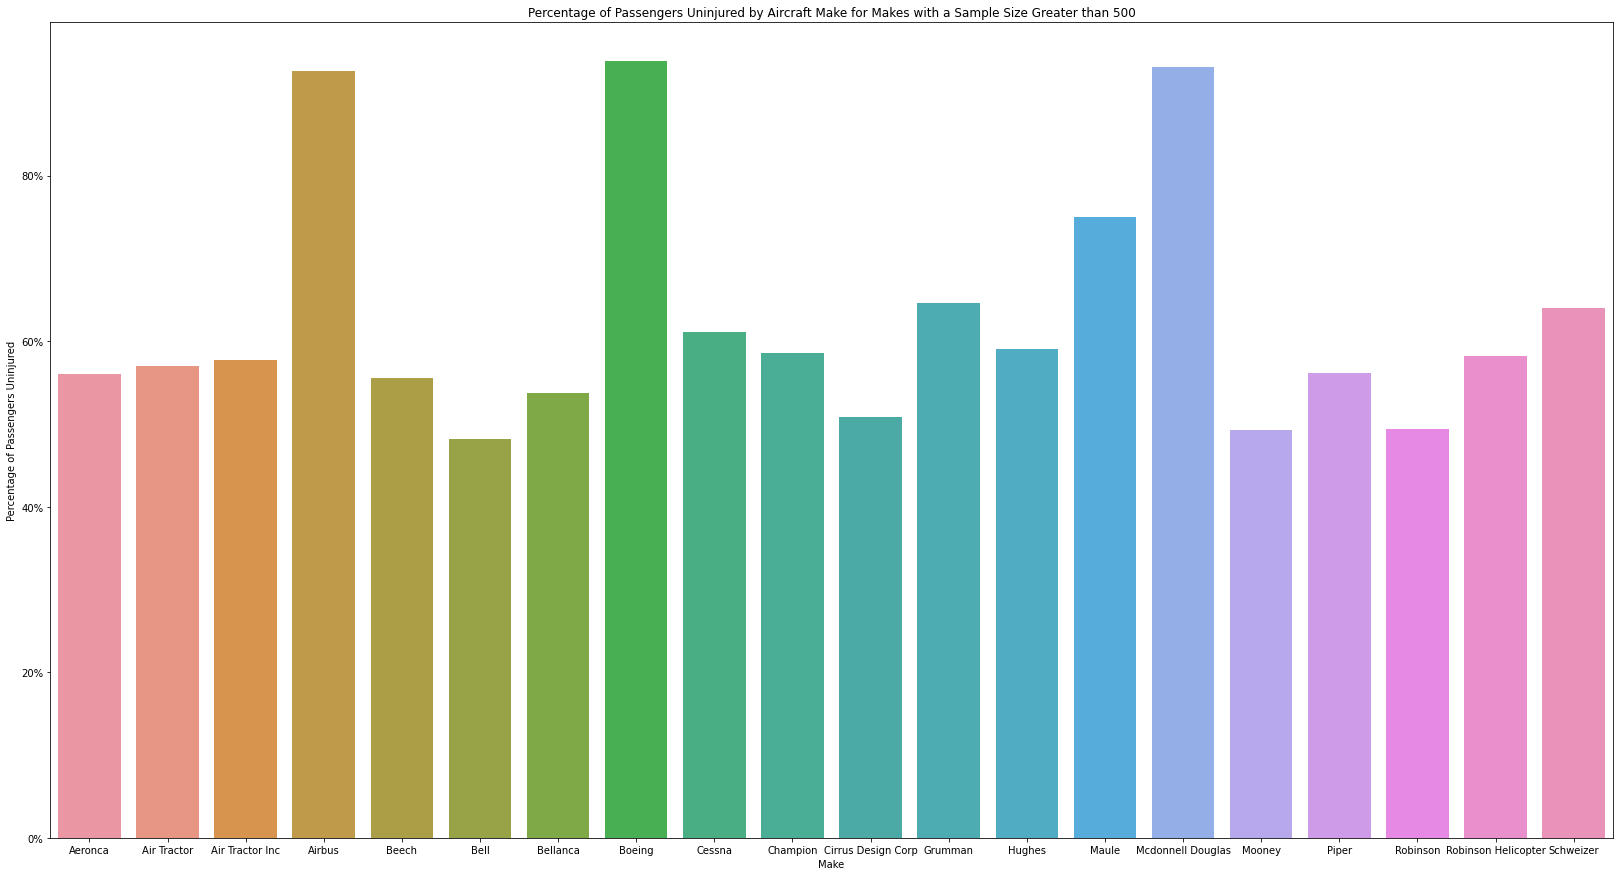

In [284]:
fig, ax = plt.subplots(figsize=(28,15))

sns.barplot(x=top_makes.index, y=top_makes['Ratio of Uninjured'])
ax.set_title('Percentage of Passengers Uninjured by Aircraft Make for Makes with a Sample Size Greater than 500')
ax.set_xlabel('Make')
ax.set_ylabel('Percentage of Passengers Uninjured')
ax.axes.yaxis.set_major_formatter(PercentFormatter(1));